<a href="https://colab.research.google.com/github/naimish75/GIS/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas==1.0.1
!pip install mapclassify
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.5 MB/s eta 0:00:00


In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import mapclassify #need for thematic map classification
import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from shapely.geometry import Point

In [3]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O Philly.zip https://www2.census.gov/geo/tiger/TIGER2023/FACES/tl_2023_42101_faces.zip

zip_ref = zipfile.ZipFile('Philly.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
Philly_shp=gpd.read_file('tl_2023_42101_faces.shp') #load the shapefile with gpd as njC

In [4]:
import pandas as pd
df_Neighbor = pd.read_excel('https://www.fourfront.us/wp-content/uploads/2024/06/Philadelphia-Neighborhoods-and-Zip-Codes-Updated_2024-05-17.xlsx',sheet_name='PIVOT-TABLE DATA')
df_BCam = pd.read_csv('https://opendata.arcgis.com/api/v3/datasets/f0ac679b40384a158f675fa107fb4cfd_0/downloads/data?format=csv&spatialRefId=4326&where=1%3D1')
df_Neighbor.head()

,Neighborhood,Primary Zips,Secondary Zips (If applicable),Neighboring Neighborhoods,Nearby Neighborhoods,USPS Locale Designation
0,Academy Gardens,19114,19136,"Aston Woodbridge, Morrell Park, Northeast Airp...","Crestmont Farms, Franklin Mills, Holmesburg, L...",Torresdale
1,Allegheny West,19132,19129,"East Falls, East Park, Glenwood, Strawberry Ma...","Brewerytown, East Falls, Franklinville, German...",North Philadelphia
2,Andorra,19128,19444,"Upper Roxborough, Wissahickon Park","Cedarbrook, Chestnut Hill, Dearnley Park, Germ...",Roxborough
3,Angora,19143,NaN,"Cobbs Creek, Squirrel Hill, Kingseeing, Cedar ...",NaN,Kingsessing
4,Ashton Woodenbridge,19114,19136,"Academy Gardens, Northeast Airport, Pennypack,...","Bustleton, Crestmont Farms, Holmesburg, Lexing...",Torresdale


In [5]:
Philly_shp['ZCTA5CE20'] = Philly_shp['ZCTA5CE20'].astype(str)
df_BCam['in_zip'] = df_BCam['in_zip'].astype(str)
df_Neighbor['Primary Zips'] = df_Neighbor['Primary Zips'].astype(str)

phC1 = pd.merge(Philly_shp, df_BCam, left_on='ZCTA5CE20',right_on='in_zip',how='inner',indicator=True)
phC1 = pd.merge(phC1, df_Neighbor,left_on='ZCTA5CE20',right_on='Primary Zips',how='inner',indicator='merge_philly_neighbor')
df_BCam.head()

,X,Y,objectid,in_zip,user_business_name,user_address,user_city,user_state,user_project_cost,user_award_approval_date,user_award_amount,user_fund_type,user_council_district_number,user_commercial_corridor
0,-75.123850,40.021769,1,19120,Restaurant & Pupuseria Emily (FoodTruck),111 W. Wyoming Ave.,Philadelphia,PA,4695.00,2024/03/18 00:00:00+00,2347.50,CSP,7,Rising Sun and Wyoming
1,-75.084787,40.016317,2,19124,Thiouna’s Professional African Hair Braiding,4660 Frankford Avenue,Philadelphia,PA,2390.99,2024/03/08 00:00:00+00,2309.99,NPI 100%,7,I do not know
2,-75.225297,39.956703,3,19139,2nd Threadz LLC,205 S. 52nd Street,Philadelphia,PA,2390.99,2024/02/27 00:00:00+00,2390.99,NPI 100%,3,52nd Street
3,-75.225026,39.965774,4,19139,Abc University,318 N. 52nd Street,Philadelphia,PA,3000.99,2024/02/27 00:00:00+00,3000.99,NPI 75%,3,52nd and Haverford
4,-75.226715,39.949853,5,19143,Johnson Family Financial Services,623 South 52nd Street,Philadelphia,PA,3000.99,2024/02/27 00:00:00+00,3000.99,NPI 100%,3,52nd and Cedar


In [6]:
phC1=phC1[['Neighborhood','X','Y','ZCTA5CE20','geometry']]
phC1.head(5)

,Neighborhood,X,Y,ZCTA5CE20,geometry
0,Clearview,-75.242744,39.912451,19153,"POLYGON ((-75.25278 39.87699, -75.25206 39.877..."
1,Eastwick,-75.242744,39.912451,19153,"POLYGON ((-75.25278 39.87699, -75.25206 39.877..."
2,Penrose,-75.242744,39.912451,19153,"POLYGON ((-75.25278 39.87699, -75.25206 39.877..."
3,Clearview,-75.226723,39.903215,19153,"POLYGON ((-75.25278 39.87699, -75.25206 39.877..."
4,Eastwick,-75.226723,39.903215,19153,"POLYGON ((-75.25278 39.87699, -75.25206 39.877..."


(-75.280266, -74.955763)

(39.867004, 40.137992)

<Axes: >

(-75.280266, -74.955763)

(39.867004, 40.137992)

[]

[]

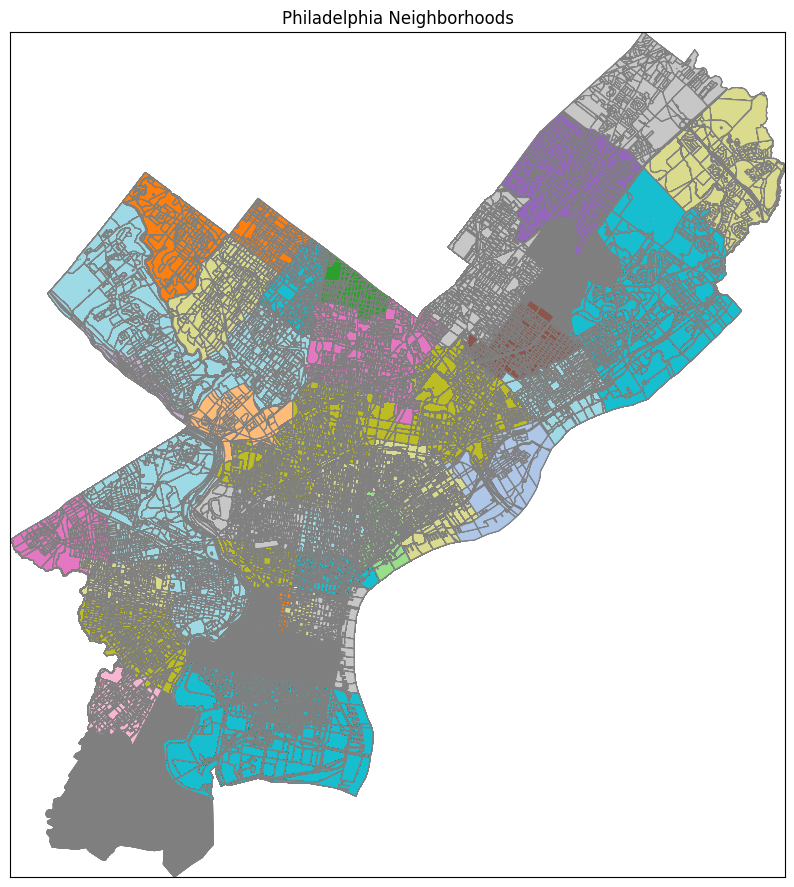

In [ ]:
# Set plot bounds to cover the entire area
fig, ax = plt.subplots(1, figsize=(10, 12))  # Increase the size to cover more area
ax.set_xlim(phC1.total_bounds[0], phC1.total_bounds[2])  # xmin, xmax
ax.set_ylim(phC1.total_bounds[1], phC1.total_bounds[3])  # ymin, ymax
# Plot the neighborhoods
phC1.plot(ax=ax, column='Neighborhood', legend=False, cmap='tab20',
          edgecolor='grey', linewidth=0.8)

# Ensure the plot covers the entire area (by using the total bounds of the data)
ax.set_xlim(phC1.total_bounds[0], phC1.total_bounds[2])  # Set x limits (xmin, xmax)
ax.set_ylim(phC1.total_bounds[1], phC1.total_bounds[3])  # Set y limits (ymin, ymax)

# Customize title and remove ticks
ax.title.set_text("Philadelphia Neighborhoods")
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Show the plot
plt.show()


<Axes: >

<Axes: >

Text(0.5, 1.0, 'Cameras in Philadelphia')

[]

[]

<ipython-input-13-32c0781c0e1b>:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(title="Legend", title_fontsize='13', fontsize='11', loc='upper right', frameon=True)


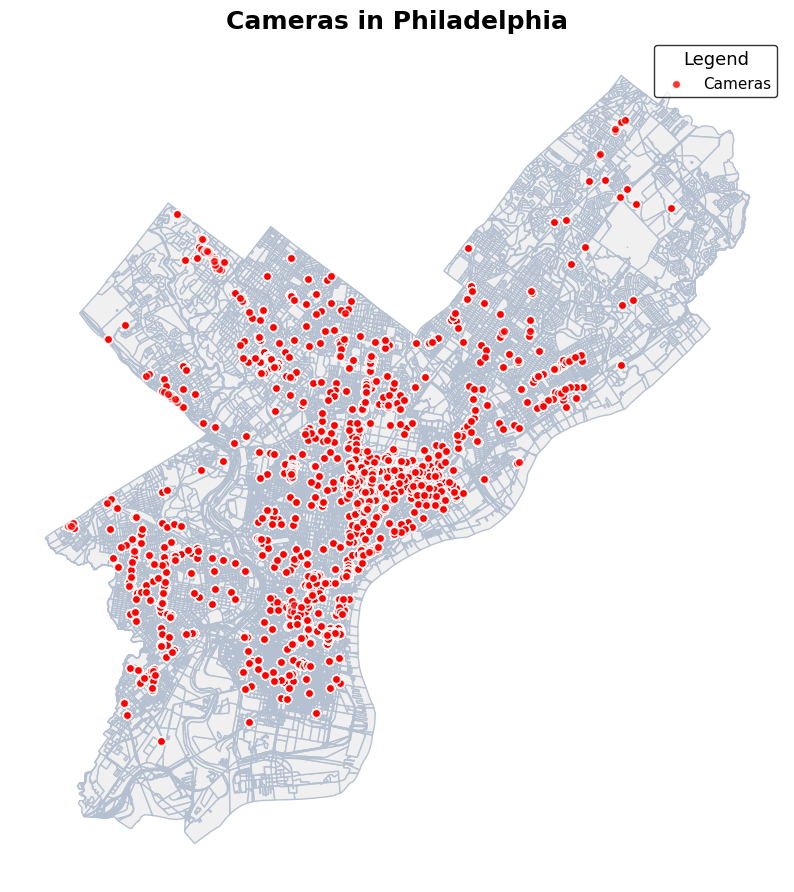

In [ ]:
# Step 1: Convert camera locations to GeoDataFrame
geometry = [Point(xy) for xy in zip(phC1['X'], phC1['Y'])]
camera_gdf = gpd.GeoDataFrame(phC1, crs="EPSG:4326", geometry=geometry)

# Step 2: Create a figure and axis to plot
fig, ax = plt.subplots(1, figsize=(10, 12))

# Step 3: Plot the Philly base shapefile as the background with improved styling
Philly_shp.plot(ax=ax, color='#f0f0f0', edgecolor='#B5C0D0', linewidth=1, label="Philadelphia Base Map")

# Step 4: Plot the cameras as a scatter plot with improved marker styling
camera_gdf.plot(ax=ax, color='red', markersize=35, marker='o', label="Cameras", alpha=0.8, edgecolor='white')

# Step 5: Customize the title, font sizes, and overall plot aesthetics
ax.set_title("Cameras in Philadelphia", fontsize=18, fontweight='bold')
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Step 6: Add a legend, increase its size and position it properly
legend = ax.legend(title="Legend", title_fontsize='13', fontsize='11', loc='upper right', frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

# Step 7: Add a neat border around the map
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the final refined plot
plt.show()


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Philadelphia Neighborhoods and Cameras')

[]

[]

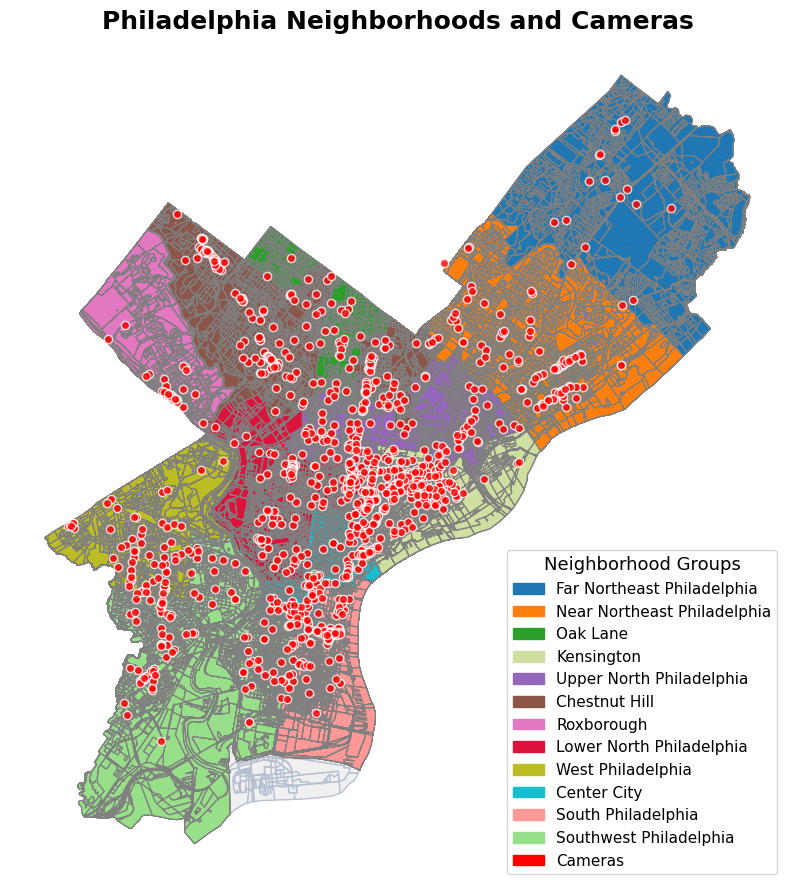

In [18]:
import matplotlib.patches as mpatches
# Step 1: Convert camera locations to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_BCam['X'], df_BCam['Y'])]
camera_gdf = gpd.GeoDataFrame(df_BCam, crs="EPSG:4326", geometry=geometry)

# Step 2: Define neighborhood groups and their respective colors
neighborhood_groups = {
    'Far Northeast Philadelphia': [
        'Academy Gardens', 'Bustleton', 'Byberry', 'Crestmont Farms', 'Morrell Park', 'Parkwood',
        'Somerton', 'Torresdale', 'Ashton Woodenbridge', 'Burholme',
        'Crescentville', 'Krewstown', 'Lawndale', 'Millbrook',
        'Modena', 'Normandy Village', 'North Torresdale', 'Northeast Philadelphia Airport',
        'Northwood', 'Oxford Circle', 'Pennypack Park', 'Pennypack Woods', 'Ryers',
        'Stanton', 'Walton Park', 'West Torresdale', 'Winchester Park','Mechanicsville'
    ],
    'Near Northeast Philadelphia': [
        'Castor Gardens', 'Fox Chase', 'Holmesburg', 'Mayfair', 'Rhawnhurst', 'Tacony',
        'Frankford', 'Wissinoming', 'Lawncrest', 'McGuire', 'Summerdale',
        'Lexington Park'
    ],
    'Oak Lane': [
        'East Oak Lane', 'West Oak Lane', 'Fern Rock', 'Ogontz', 'Logan', 'Cedarbrook'
    ],
    'Kensington': [
        'Kensington', 'East Kensington', 'West Kensington', 'Upper Kensington', 'Harrowgate',
        'Fishtown', 'Old Kensington', 'Port Richmond', 'Richmond', 'River Wards','Bridesburg'
    ],
    'Upper North Philadelphia': [
        'Allegheny West', 'Fairhill', 'Hunting Park', 'Nicetown', 'Tioga', 'Juniata Park',
        'Feltonville'
    ],
    'Chestnut Hill': [
        'Chestnut Hill', 'Blue Bell Hill', 'East Mount Airy', 'Germantown - East',
        'Germantown - Morton', 'Germantown - Southwest', 'Germantown - West Central',
        'Germantown - Westside', 'Olney', 'Penn Knox', 'West Mount Airy', 'Wissahickon Park', 'Wister'
    ],
    'Roxborough': [
        'Andorra', 'Manayunk', 'Wissahickon', 'Roxborough', 'Upper Roxborough', 'Dearnley Park',
        'Germany Hill', 'Roxborough Park', 'Wissahickon Hills'
    ],
    'Lower North Philadelphia': [
        'North Central', 'Brewerytown', 'Sharswood', 'Strawberry Mansion', 'Glenwood', 'Ludlow',
        'East Falls', 'East Poplar', 'Fairmount', 'Francisville', 'Spring Garden', 'Hartranft'
    ],
    'West Philadelphia': [
        'Belmont', 'Cobbs Creek', 'Dunlap', 'East Parkside', 'Haddington', 'Mantua', 'Mill Creek',
        'Overbrook', 'Powelton', 'Saunders Park', 'Spruce Hill', 'Walnut Hill', 'University City',
        'Wynnefield', 'West Parkside', 'West Poplar', 'West Powelton', 'Kingsessing', 'Carroll Park',
        'Cathedral Park', 'Cedar Park', 'Garden Court', 'Haverford North', 'West Park',
        'Wynnefield Heights'
    ],
    'Center City': [
        'Avenue of the Arts North', 'Avenue of the Arts South', 'Center City', 'Center City East',
        'Center City West', 'Chinatown', 'Logan Square', 'Old City', 'Rittenhouse',
        'Society Hill', 'Washington Square West', 'Callowhill', 'Christian Street Historic District',
        'Fitler Square', 'Graduate Hospital', 'Greenwich', 'Northern Liberties',
        'Yorktown'
    ],
    'South Philadelphia': [
        'Bella Vista', 'Dickinson Narrows', 'East Passyunk Crossing', 'Girard Estates',
        'Lower Moyamensing', 'Marconi Plaza', 'Newbold', 'Passyunk Square', 'Pennsport',
        'Point Breeze', 'Queen Village', 'Stadium District', 'Whitman', 'Hawthorne',
        'Italian Market', 'Little Saigon', 'Packer Park', 'Passyunk', 'Penrose', 'Riverfront',
        'West Passyunk'
    ],
    'Southwest Philadelphia': [
        'Bartram Village', 'Elmwood', 'Grays Ferry', 'Paschall', 'Southwest Schuylkill',
        'Kingsessing', 'Angora', 'Clearview', 'Devil\'s Pocket', 'Eastwick', 'Mount Moriah',
        'Naval Square', 'Woodland Terrace'
    ]
}

region_colors = {
    'Far Northeast Philadelphia': '#1f77b4',
    'Near Northeast Philadelphia': '#ff7f0e',
    'Oak Lane': '#2ca02c',
    'Kensington': '#CEDF9F',
    'Upper North Philadelphia': '#9467bd',
    'Chestnut Hill': '#8c564b',
    'Roxborough': '#e377c2',
    'Lower North Philadelphia': '#dc143c',
    'West Philadelphia': '#bcbd22',
    'Center City': '#17becf',
    'South Philadelphia': '#ff9896',
    'Southwest Philadelphia': '#98df8a'
}


# Create a new column 'Region' based on the neighborhood groupings
phC1['Region'] = phC1['Neighborhood'].apply(lambda x: next((key for key, value in neighborhood_groups.items() if x in value), 'Other'))

# Step 3: Create a figure and axis to plot
fig, ax = plt.subplots(1, figsize=(10, 12))

# Step 4: Plot the Philly base shapefile as the background
Philly_shp.plot(ax=ax, color='#f0f0f0', edgecolor='#B5C0D0', linewidth=1)

# Plot each region with its corresponding color
for region, color in region_colors.items():
    phC1[phC1['Region'] == region].plot(ax=ax, color=color, edgecolor='grey', linewidth=0.8)

# Step 6: Plot the cameras as a scatter plot
camera_gdf.plot(ax=ax, color='red', markersize=35, marker='o', alpha=0.8, edgecolor='white')

# Step 7: Add a custom legend for neighborhood groups (regions)
patches = [mpatches.Patch(color=color, label=region) for region, color in region_colors.items()]
camera_patch = mpatches.Patch(color='red', label='Cameras')  # Add legend for cameras
patches.append(camera_patch)
ax.legend(handles=patches, title="Neighborhood Groups", title_fontsize='13', fontsize='11', loc='lower right', frameon=True)

# Step 8: Customize the title and remove ticks
ax.set_title("Philadelphia Neighborhoods and Cameras", fontsize=18, fontweight='bold')
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Add a neat border around the map
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the final refined plot
plt.show()